In [0]:
# IMPORT ALL NEEDED MODULES

import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import requests
import folium
import json
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (jaccard_similarity_score, f1_score, log_loss,
  classification_report, confusion_matrix)
from geopy.distance import distance
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim

In [0]:
# SET PREFERRED FONT FOR GRAPHS

plt.rcParams['font.family'] = "monospace"

In [0]:
# FOURSQUARE CREDENTIALS

CLIENT_ID = 'VHSY234TCBMJ31GRMHCVW3FMO1A3412INITUQKSUMXPZ4XEK'
CLIENT_SECRET = 'DJGTTS2AIKGUHNDS3WOC34SLMV1HUMPJ4KDY1NVGG351MNFO'
VERSION = '20181221'

In [0]:
# CLASSIFICATION OF VENUE CATEGORIES
# 0 -> not very useful
# 1 -> convenient
# 2 -> useful

category_0 = ['Accessories Store', 'Adult Boutique', 'Airport', 'Airport Food Court', 'Airport Gate', 'Airport Lounge', 'Airport Service', 'Airport Terminal', 'Antique Shop', 
              'Art Gallery', 'Art Museum', 'Bar', 'Basketball Stadium', 'Beer Bar', 'Beer Store', 'Boat or Ferry', 'Bistro', 'Boutique', 'Breakfast Spot', 'Brewery', 'Bridal Shop', 
              'Bubble Tea Shop', 'Cafeteria', 'Café', 'Climbing Gym', 'Cocktail Bar', 'Coffee Shop', 'College Arts Building', 'College Gym', 'College Stadium', 'Concert Hall', 
              'Construction & Landscaping', 'Cosmetics Shop', 'Coworking Space', 'Creperie', 'Curling Ice', 'Dessert Shop', 'Event Space', 'Field', 'Flea Market', 'Flower Shop', 
              'Fountain', 'Fraternity House', 'Garden Center', 'Gay Bar', 'General Entertainment', 'General Travel', 'Gift Shop', 'Golf Course', 'Gourmet Shop', 'Harbor / Marina', 
              'Health & Beauty Service', 'Historic Site', 'History Museum', 'Hockey Arena', 'Home Service', 'Hotel', 'Hotel Bar', 'Indie Movie Theater', 'Intersection', 'Jazz Club',
              'Jewelry Store', 'Juice Bar', 'Lake', 'Light Rail Station', 'Liquor Store', 'Lounge', 'Massage Studio', 'Miscellaneous Shop', 'Mobile Phone Shop', 'Monument / Landmark', 
              'Motel', 'Moving Target', 'Museum', 'Music Store', 'Music Venue', 'Neighborhood', 'Nightclub', 'Office', 'Paper / Office Supplies Store', 'Performing Arts Venue', 'Piano Bar', 
              'Plane', 'Plaza', 'Pub', 'Record Shop', 'Rental Car Location', 'River', 'Rock Climbing Spot', 'Sculpture Garden', 'Smoke Shop', 'Smoothie Shop', 'Social Club', 'Spa', 
              'Speakeasy', 'Sports Bar', 'Stadium', 'Stationery Store', 'Supplement Shop', 'Tailor Shop', 'Tanning Salon', 'Tea Room', 'Theater', 'Thrift / Vintage Store', 'Trail', 
              'Train Station', 'Video Store', 'Warehouse Store', 'Wine Bar', 'Wings Joint', 'Women\'s Store', 'Yoga Studio', 'Donut Shop', 'Mattress Store', 'Bowling Alley', 'Platform', 
              'Tennis Stadium', 'Men\'s Store', 'Track', 'Tattoo Parlor', 'Hostel', 'Check Cashing Service', 'Martial Arts Dojo', 'Airport Tram', 'Distillery', 'Cupcake Shop', 
              'Waste Facility', 'Shipping Store', 'Scenic Lookout', 'Weight Loss Center', 'Indie Theater', 'Building', 'Hookah Bar', 'Buffet', 'Wine Shop', 'Dive Bar', 'Lawyer', 
              'Factory', 'Non-Profit', 'Karaoke Bar', 'Lingerie Store', 'Racetrack', 'Pie Shop', 'Nail Salon', 'Pilates Studio', 'Waterfront', 'Beer Garden', 'Gaming Cafe', 'Farm', 
              'Rock Club', 'Print Shop', 'Other Repair Shop', 'Event Service', 'Baseball Stadium', 'Surf Spot', 'Hot Dog Joint', 'Motorcycle Shop', 'Boxing Gym', 'Sake Bar', 'Roof Deck', 
              'Other Nightlife', 'Bike Trail', 'Cycle Studio', 'Street Art', 'College Academic Building', 'Residential Building (Apartment / Condo)', 'Train', 'Opera House', 'Comedy Club', 
              'Christmas Market', 'Pet Café', 'Pier', 'Gym Pool', 'Animal Shelter', 'Newsstand', 'Design Studio', 'Board Shop', 'Outdoor Sculpture', 'Irish Pub', 'Memorial Site', 
              'Auditorium', 'Tree', 'Pool Hall', 'Pop-Up Shop', 'Lighthouse', 'Bed & Breakfast', 'Beach Bar', 'College Basketball Court', 'College Cafeteria', 'Tourist Information Center',
              'Motorsports Shop', 'Nightlife Spot', 'Business Service', 'Recording Studio', 'IT Services', 'Insurance Office', 'Toll Plaza', 'Big Box Store', 
              'Molecular Gastronomy Restaurant', 'Automotive Shop', 'Spiritual Center', 'Duty-free Shop', 'Heliport', 'Rental Service', 'Bridge', 'Laser Tag', 'Whisky Bar', 'Rest Area', 
              'Hotel Pool', 'Fishing Spot', 'Pedestrian Plaza', 'Taxi Stand', 'Leather Goods Store', 'Casino', 'Food Stand', 'Road', 'Camera Store', 'College Rec Center', 'Auto Dealership',
              'Housing Development', 'Ski Chalet', 'Ski Area', 'Outdoor Supply Store', 'Storage Facility', 'Kitchen Supply Store', 'Badminton Court', 'Amphitheater', 'Chiropractor',
              'Tunnel', 'Racecourse', 'Photography Studio', 'Kofte Place', 'Souvenir Shop', 'Shoe Repair', 'Car Wash', 'Botanical Garden', 'Professional & Other Places', 'Public Art',
              'Bath House']
category_1 = ['American Restaurant', 'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports', 'Auto Garage', 'Auto Workshop', 'BBQ Joint', 'Bagel Shop', 'Bank', 'Baseball Field', 
              'Basketball Court', 'Belgian Restaurant', 'Bike Shop', 'Burger Joint', 'Burrito Place', 'Cajun / Creole Restaurant', 'Candy Store', 'Caribbean Restaurant', 'Cheese Shop', 
              'Chinese Restaurant', 'Chocolate Shop', 'Church', 'Comfort Food Restaurant', 'Comic Shop', 'Cuban Restaurant', 'Dance Studio', 'Deli / Bodega', 'Department Store', 
              'Dim Sum Restaurant', 'Diner', 'Dog Run', 'Drugstore', 'Dumpling Restaurant', 'Eastern European Restaurant', 'Electronics Store', 'Ethiopian Restaurant', 
              'Falafel Restaurant', 'Fast Food Restaurant', 'Fish & Chips Shop', 'Food', 'Food & Drink Shop', 'Food Court', 'Food Truck', 'French Restaurant', 'Fried Chicken Joint', 
              'Frozen Yogurt Shop', 'Furniture / Home Store', 'Garden', 'Gastropub', 'Greek Restaurant', 'Gym', 'Gym / Fitness Center', 'Hakka Restaurant', 'Hardware Store', 'Hobby Shop', 
              'Ice Cream Shop', 'Indian Restaurant', 'Indonesian Restaurant', 'Italian Restaurant', 'Japanese Restaurant', 'Jewish Restaurant', 'Korean Restaurant', 
              'Latin American Restaurant', 'Mediterranean Restaurant', 'Mexican Restaurant', 'Middle Eastern Restaurant', 'Movie Theater', 'New American Restaurant', 'Noodle House', 
              'Persian Restaurant', 'Pet Store', 'Pizza Place', 'Poke Place', 'Pool', 'Portuguese Restaurant', 'Ramen Restaurant', 'Restaurant', 'Salad Place', 'Salon / Barbershop', 
              'Sandwich Place', 'Seafood Restaurant', 'Shopping Plaza', 'Skate Park', 'Skating Rink', 'Snack Place', 'Soccer Field', 'Sporting Goods Shop', 'Steakhouse', 'Summer Camp', 
              'Sushi Restaurant', 'Swim School', 'Taco Place', 'Taiwanese Restaurant', 'Tennis Court', 'Thai Restaurant', 'Toy / Game Store', 'Vegetarian / Vegan Restaurant',
              'Video Game Store', 'Vietnamese Restaurant', 'Spanish Restaurant', 'Laundromat', 'Soup Place', 'Arcade', 'Food Service', 'Dry Cleaner', 
              'African Restaurant', 'Paella Restaurant', 'Peruvian Restaurant', 'Community Center', 'South American Restaurant', 'Arepa Restaurant', 'Southern / Soul Food Restaurant',
              'Optical Shop', 'Shabu-Shabu Restaurant', 'Hotpot Restaurant', 'Laundry Service', 'Polish Restaurant', 'Gymnastics Gym', 'Other Great Outdoors', 'Beach', 
              'Russian Restaurant', 'Varenyky restaurant', 'Turkish Restaurant', 'Pakistani Restaurant', 'Argentinian Restaurant', 'Israeli Restaurant', 'Tapas Restaurant', 
              'Theme Park Ride / Attraction', 'German Restaurant', 'Cantonese Restaurant', 'Lebanese Restaurant', 'English Restaurant', 'Malay Restaurant', 'Veterinarian', 
              'Japanese Curry Restaurant', 'Czech Restaurant', 'Afghan Restaurant', 'High School', 'Music School', 'Szechuan Restaurant', 'Hawaiian Restaurant', 'Shanghai Restaurant',
              'Moroccan Restaurant', 'Swiss Restaurant', 'Filipino Restaurant', 'Bike Rental / Bike Share', 'Brazilian Restaurant', 'Empanada Restaurant', 'Colombian Restaurant', 
              'Pet Service', 'Gas Station', 'Egyptian Restaurant', 'Kosher Restaurant', 'Shop & Service', 'Multiplex', 'Austrian Restaurant', 'Gluten-free Restaurant', 'Halal Restaurant', 
              'Sri Lankan Restaurant', 'Mini Golf', 'Go Kart Track', 'Sports Club', 'Tibetan Restaurant', 'Recreation Center', 'Theme Park', 'Tex-Mex Restaurant', 'Australian Restaurant', 
              'Campground', 'Caucasian Restaurant', 'South Indian Restaurant', 'Zoo Exhibit', 'Doner Restaurant', 'Modern European Restaurant', 'National Park', 'Scandinavian Restaurant',
              'Romanian Restaurant', 'Himalayan Restaurant', ]
category_2 = ['Baby Store', 'Bakery', 'Bookstore', 'Bus Line', 'Bus Station', 'Bus Stop', 'Butcher', 'Clothing Store', 'Convenience Store', 'Discount Store', 'Farmers Market', 
              'Fish Market', 'Fruit & Vegetable Store', 'Grocery Store', 'Health Food Store', 'Market', 'Medical Center', 'Metro Station', 'Organic Grocery', 'Park',
              'Pharmacy', 'Playground', 'Shoe Store', 'Shopping Mall', 'Supermarket', 'Kids Store', 'Eye Doctor', 'Outdoors & Recreation', 'Used Bookstore', 'School', 'Library']

In [0]:
# CATEGORY CLASSES UTILITIES

categories = {0.1: category_0, 1: category_1, 10: category_2}
venue_classes = {0: category_0, 1: category_1, 2: category_2}
category_list = sorted(category_0+category_1+category_2)

# list of coefficients used to compute neighborhood score
multipliers = [key for category in category_list for key in categories.keys() if category in categories[key]]

# function to get class of a venue category
def getVenueClass(category):
  for key in venue_classes.keys():
    if category in venue_classes[key]:
      return key

In [0]:
# function to get venues of Toronto's neighborhoods
def getNearbyVenuesToronto(names, latitudes, longitudes):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
      radius = min([distance((lat, lng), coords).m for coords in zip(latitudes, longitudes) if coords != (lat, lng)]) / 2
      url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
          CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius)
      response = requests.get(url).json()["response"]
      if response:
        results = response['groups'][0]['items']
        venues_list.append([(name, lat, lng, v['venue']['name'], 
            v['venue']['location']['lat'], v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['PostalCode', 'PostalCode Latitude', 
                  'PostalCode Longitude', 'Venue', 'Venue Latitude', 
                  'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [0]:
# function to get venues of New York's neighborhoods
def getNearbyVenuesNewYork(names, latitudes, longitudes):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
      radius = min([distance((lat, lng), coords).m for coords in zip(latitudes, longitudes) if coords != (lat, lng)]) / 2
      url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
          CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius)
      response = requests.get(url).json()["response"]
      if response:
        results = response['groups'][0]['items']
        venues_list.append([(name, lat, lng, v['venue']['name'], 
            v['venue']['location']['lat'], v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 'Venue', 'Venue Latitude', 
                  'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [0]:
# scraping of Wikipedia article to get list of Toronto's areas

wikipedia_page = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
source = requests.get(wikipedia_page).text
soup = BeautifulSoup(source, 'lxml')
table = soup.find('table')
data = []
for i, row in enumerate(table.find_all('tr')):
  entry = [item.text for item in row.find_all('td')]
  if entry and entry[1] != 'Not assigned':
    if entry[0] not in [item['Postcode'] for item in data]:
      data.append({'Postcode': entry[0],
                   'Borough': entry[1],
                   'Neighbourhood': entry[2].rstrip() if entry[2].rstrip() != 'Not assigned' else entry[1]})
    else:
      index = [i for i, item in enumerate(data) if item['Postcode'] == entry[0]][0]
      data[index]['Neighbourhood'] += ', '+entry[2].rstrip()
toronto_areas = pd.DataFrame(data=data, columns=['Postcode', 'Borough', 'Neighbourhood'])
toronto_areas.columns = ['PostalCode', 'Borough', 'Neighbourhood']
coords = pd.read_csv('http://cocl.us/Geospatial_data')
toronto_data = pd.merge(toronto_areas, coords, left_on='PostalCode', right_on='Postal Code', suffixes=('', '')).drop('Postal Code', 1)

In [13]:
# retrieval of Toronto's neighborhoods' venue data

toronto_venues = getNearbyVenuesToronto(toronto_data.PostalCode, toronto_data.Latitude, toronto_data.Longitude)
toronto_venues.shape

(2190, 7)

In [14]:
# Toronto's venue data set trasformation

# get category dummies
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
for category in category_list:
  if category not in toronto_onehot.columns:
    toronto_onehot[category] = [0 for i in range(toronto_onehot.shape[0])]
toronto_onehot['PostalCode'] = toronto_venues['PostalCode']
fixed_columns = [toronto_onehot.columns[-1]] + sorted(list(toronto_onehot.columns[:-1]))
toronto_onehot = toronto_onehot[fixed_columns]
# group by area
toronto_grouped = toronto_onehot.groupby('PostalCode').mean().reset_index()
# apply category class multipliers
toronto_weighted = toronto_grouped[category_list] * multipliers
# compute neighborhood score
toronto_weighted['Score'] = toronto_weighted[category_list].sum(axis=1)
# assign suitability
toronto_weighted['Suitability'] = toronto_weighted['Score'] > 2.5
toronto_weighted['Suitability'] = toronto_weighted['Suitability'].apply(int)
toronto_grouped['Suitability'] = toronto_weighted['Suitability']
toronto_grouped['Score'] = toronto_weighted['Score']
toronto_scores = pd.merge(toronto_data, toronto_grouped[['PostalCode', 'Score', 'Suitability']], on='PostalCode', how='outer', suffixes=('', ''))
toronto_scores.where(pd.notnull(toronto_scores), 0)
toronto_scores.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Score,Suitability
0,M3A,North York,Parkwoods,43.753259,-79.329656,5.189655,1.0
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.675000,0.0
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,2.380000,0.0
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,1.600000,0.0
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494,0.280000,0.0


In [15]:
# import of New York's neighborhood list from JSON file

newyork_json = json.loads(requests.get('https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json').text)['features']
column_names = ['Borough', 'Neighbourhood', 'Latitude', 'Longitude'] 
newyork_data = pd.DataFrame(columns=column_names)

for data in newyork_json:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    newyork_data = newyork_data.append({'Borough': borough,
                                        'Neighbourhood': neighborhood_name,
                                        'Latitude': neighborhood_lat,
                                        'Longitude': neighborhood_lon}, ignore_index=True)
    
newyork_data.shape

(306, 4)

In [16]:
# retrieval of New York's neighborhoods' venue data

newyork_venues = getNearbyVenuesNewYork(newyork_data.Neighbourhood, newyork_data.Latitude, newyork_data.Longitude)
newyork_venues.shape

(6084, 7)

In [17]:
# New York's venue data set transformation

# get category dummies
newyork_onehot = pd.get_dummies(newyork_venues[['Venue Category']], prefix="", prefix_sep="")
for category in category_list:
  if category not in newyork_onehot.columns:
    newyork_onehot[category] = [0 for i in range(newyork_onehot.shape[0])]
newyork_onehot['Neighbourhood'] = newyork_venues['Neighbourhood']
fixed_columns = [newyork_onehot.columns[-1]] + sorted(list(newyork_onehot.columns[:-1]))
newyork_onehot = newyork_onehot[fixed_columns]
# group by neighborhood
newyork_grouped = newyork_onehot.groupby('Neighbourhood').mean().reset_index()
# apply category class multipliers
newyork_weighted = newyork_grouped[category_list] * multipliers
# compute neighborhood score
newyork_weighted['Score'] = newyork_weighted[category_list].sum(axis=1)
# assign suitability
newyork_weighted['Suitability'] = newyork_weighted['Score'] > 2.5
newyork_weighted['Suitability'] = newyork_weighted['Suitability'].apply(int)
newyork_grouped['Suitability'] = newyork_weighted['Suitability']
newyork_grouped['Score'] = newyork_weighted['Score']
newyork_scores = pd.merge(newyork_data, newyork_grouped[['Neighbourhood', 'Score', 'Suitability']], on='Neighbourhood', how='outer', suffixes=('', ''))
newyork_scores.where(pd.notnull(newyork_scores), 0)
newyork_scores.head()

,Borough,Neighbourhood,Latitude,Longitude,Score,Suitability
0,Bronx,Wakefield,40.894705,-73.847201,1.70,0.0
1,Bronx,Co-op City,40.874294,-73.829939,3.97,1.0
2,Bronx,Eastchester,40.887556,-73.827806,1.66,0.0
3,Bronx,Fieldston,40.895437,-73.905643,3.40,1.0
4,Bronx,Riverdale,40.890834,-73.912585,0.55,0.0


In [0]:
# get New York's coordinates for map

address = 'New York City, NY'

geolocator = Nominatim(user_agent='coursera-capstone-project')
location = None
while not location:
  location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [0]:
# display New York's neighborhoods on map, with purple marker if suitable, red otherwise

map_newyork = folium.Map(location=[latitude, longitude], zoom_start=11)
neighborhoods = zip(newyork_scores['Latitude'], newyork_scores['Longitude'], newyork_scores['Borough'], newyork_scores['Neighbourhood'], newyork_scores['Suitability'])

for lat, lng, borough, neighborhood, score in neighborhoods:
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label)
    color = 'purple' if score else 'red'
    icon = 'thumbs-up' if score else 'thumbs-down'
    marker = folium.Marker(location=[lat, lng], popup=label, icon=folium.Icon(icon=icon, color=color)).add_to(map_newyork)  
    
# map_newyork

In [20]:
# prepare New York's data set for test training

X_NY = np.asarray(newyork_grouped[category_list])
y_NY = np.asarray(newyork_grouped['Suitability'])
X_NY_train, X_NY_test, y_NY_train, y_NY_test = train_test_split(X_NY, y_NY, test_size=0.2, random_state=0)
print('Train set:', X_NY_train.shape,  y_NY_train.shape)
print('Test set:', X_NY_test.shape,  y_NY_test.shape)

Train set: (240, 447) (240,)
Test set: (61, 447) (61,)


In [21]:
# create Logistic Regression model and fit with New York's split data set to test

test_model = LogisticRegression(C=0.3, solver='liblinear', random_state=0, class_weight='balanced').fit(X_NY_train, y_NY_train)
yhat_NY = test_model.predict(X_NY_test)
# compute Jaccard index to assert accuracy
jaccard_similarity_score(y_NY_test, yhat_NY)

0.8360655737704918

In [0]:
# fit final model with New York's full data set

model = test_model.fit(X_NY, y_NY)

In [0]:
# prepare Toronto's data set

X_T = np.asarray(toronto_grouped[category_list])
y_T = np.asarray(toronto_grouped['Suitability'])

In [24]:
# compute Jaccard index, Log loss and F1 score

yhat_T = model.predict(X_T)
yhat_T_prob = model.predict_proba(X_T)
jaccard_similarity_score(yhat_T, y_T), log_loss(y_T, yhat_T_prob), f1_score(y_T, yhat_T)

(0.8529411764705882, 0.6574886809519366, 0.8235294117647058)

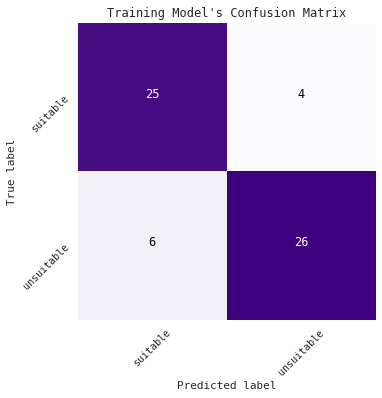

In [26]:
# plot training model's confusion matrix

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation=45)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    
tm_cnf_matrix = confusion_matrix(y_NY_test, yhat_NY, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(tm_cnf_matrix, classes=['suitable', 'unsuitable'], title='Training Model\'s Confusion Matrix')

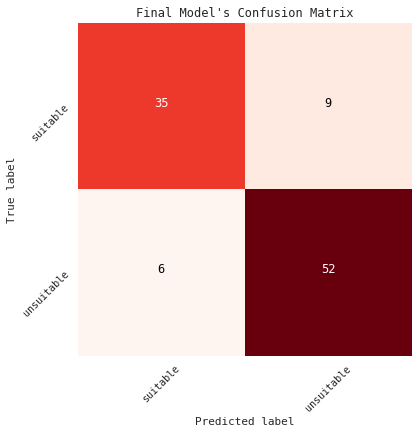

In [27]:
# plot final model's confusion matrix

fm_cnf_matrix = confusion_matrix(y_T, yhat_T, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure(figsize=(6, 6))
plot_confusion_matrix(fm_cnf_matrix, classes=['suitable', 'unsuitable'], title='Final Model\'s Confusion Matrix', cmap=plt.cm.Reds)

In [29]:
# count how many venues there are for each category class

# get list of New York venues with category
newyork_category_classes = newyork_venues[['Venue', 'Venue Category']].copy()
# get category class
newyork_category_classes['Venue Class'] = newyork_category_classes['Venue Category'].apply(getVenueClass)
# group by class and count
category_classes = newyork_category_classes[['Venue', 'Venue Class']].groupby('Venue Class').count().reset_index()
category_classes.columns = ['Venue Class', 'New York Venues']
# get list of Toronto venues with category
toronto_category_classes = toronto_venues[['Venue', 'Venue Category']].copy()
# get category class
toronto_category_classes['Venue Class'] = toronto_category_classes['Venue Category'].apply(getVenueClass)
# group by class and count, and merge with previous results
category_classes = category_classes.merge(toronto_category_classes[['Venue', 'Venue Class']].groupby('Venue Class').count().reset_index(), on='Venue Class', suffixes=('', ''))
category_classes.columns = ['Venue Class', 'New York Venues', 'Toronto Venues']
category_classes.head()

,Venue Class,New York Venues,Toronto Venues
0,0.0,1848,715
1,1.0,3197,1067
2,2.0,1034,405


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


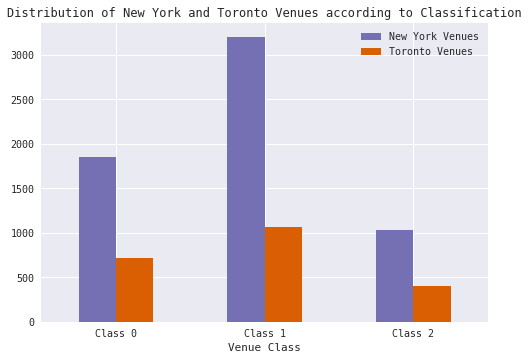

In [30]:
# plot distribution of venues per category class

ax = category_classes.plot(x='Venue Class', y=['New York Venues', 'Toronto Venues'], kind='bar', color=['#7570b3','#d95f02','#1b9e77'])
ax.set_xticklabels(('Class 0', 'Class 1', 'Class 2'), rotation='horizontal')
ax.set_title('Distribution of New York and Toronto Venues according to Classification')
plt.show()

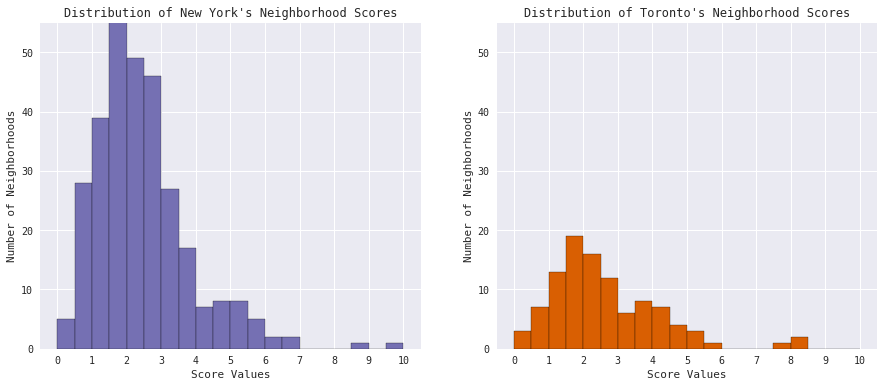

In [32]:
# plot histogram of New York's and Toronto's neighborhood scores

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))
ax1.hist(newyork_grouped['Score'], bins=np.arange(0, 10.5, 0.5), ec='black', color='#7570b3')
ax1.set_xticks(range(0, 11))
ax1.set_ylim(top=55)
ax1.set_xlabel('Score Values')
ax1.set_ylabel('Number of Neighborhoods')
ax1.set_title('Distribution of New York\'s Neighborhood Scores')
ax2.hist(toronto_grouped['Score'], bins=np.arange(0, 10.5, 0.5), ec='black', color='#d95f02')
ax2.set_xticks(range(0, 11))
ax2.set_ylim(top=55)
ax2.set_xlabel('Score Values')
ax2.set_ylabel('Number of Neighborhoods')
ax2.set_title('Distribution of Toronto\'s Neighborhood Scores')
plt.show()

In [33]:
# compute New York's neighborhood scores' mean and st. d.

newyork_grouped['Score'].mean(), newyork_grouped['Score'].std()

(2.4271433392331256, 1.4050713537141133)

In [34]:
# compute Toronto's neighborhood scores' mean and st. d.

toronto_grouped['Score'].mean(), toronto_grouped['Score'].std()

(2.620252587479701, 1.57355467736594)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


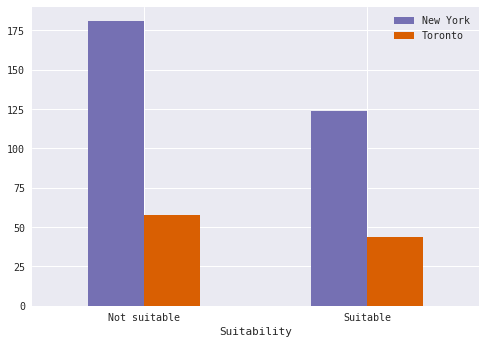

In [35]:
# plot count of suitable/not suitable neighborhoods per city

newyork_count = newyork_scores[['Neighbourhood', 'Suitability']].groupby('Suitability').count().reset_index()
toronto_count = toronto_scores[['PostalCode', 'Suitability']].groupby('Suitability').count().reset_index()
count = pd.merge(newyork_count, toronto_count, on='Suitability', suffixes=('', ''))
ax = count.plot.bar(x='Suitability', y=['Neighbourhood', 'PostalCode'], color=['#7570b3','#d95f02','#1b9e77'])
ax.set_xticklabels(('Not suitable', 'Suitable'), rotation='horizontal')
ax.legend(['New York', 'Toronto'])
plt.show()

In [0]:
# get Toronto's coordinates for map

address = 'Toronto, Canada'

geolocator = Nominatim(user_agent='coursera-capstone-project')
location = None
while not location:
  location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [0]:
# display Toronto's neighborhoods on map, with purple marker if suitable, red otherwise (true classification)

map_toronto_true = folium.Map(location=[latitude, longitude], zoom_start=11)
neighborhoods = zip(toronto_scores['Latitude'], toronto_scores['Longitude'], toronto_scores['Borough'], toronto_scores['Neighbourhood'], toronto_scores['Suitability'])

for lat, lng, borough, neighborhood, score in neighborhoods:
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label)
    color = 'purple' if score else 'red'
    icon = 'thumbs-up' if score else 'thumbs-down'
    marker = folium.Marker(location=[lat, lng], popup=label, icon=folium.Icon(icon=icon, color=color)).add_to(map_toronto_true)  
    
# map_toronto_true

In [0]:
# display Toronto's neighborhoods on map, with purple marker if suitable, red otherwise (predicted classification)

map_toronto_pred = folium.Map(location=[latitude, longitude], zoom_start=11)
neighborhoods = zip(toronto_scores['Latitude'], toronto_scores['Longitude'], toronto_scores['Borough'], toronto_scores['Neighbourhood'], yhat_T)

for lat, lng, borough, neighborhood, score in neighborhoods:
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label)
    color = 'purple' if score else 'red'
    icon = 'thumbs-up' if score else 'thumbs-down'
    marker = folium.Marker(location=[lat, lng], popup=label, icon=folium.Icon(icon=icon, color=color)).add_to(map_toronto_pred)  
    
# map_toronto_pred

In [0]:
# compute New York's neighborhoods' suitability labels for varying score thresholds

newyork_scores_mult = newyork_grouped[['Neighbourhood', 'Score']].copy()
for i in np.arange(1,6.5,0.5):
  label = str(i).replace('.', '_')
  newyork_scores_mult['S_'+label] = newyork_scores_mult['Score'] > i
  newyork_scores_mult['S_'+label] = newyork_scores_mult['S_'+label].apply(int)
# newyork_scores_mult.head()

In [0]:
# compute Toronto's neighborhoods' suitability labels for varying score thresholds

toronto_scores_mult = toronto_grouped[['PostalCode', 'Score']].copy()
for i in np.arange(1, 6.5, 0.5):
  label = 'S_' + str(i).replace('.', '_')
  toronto_scores_mult[label] = toronto_scores_mult['Score'] > i
  toronto_scores_mult[label] = toronto_scores_mult[label].apply(int)
# toronto_scores_mult.head()

In [0]:
# train a model for each different score threshold with previously assigned labels, and record their accuracy

# initiate metrics' dictionaries
jaccard_indexes = {}
log_losses = {}
f1_scores = {}
for i in np.arange(1, 6.5, 0.5):
  # create label
  label = 'S_' + str(i).replace('.', '_')
  # prepare training data set
  X_i_train = np.asarray(newyork_grouped[category_list])
  y_i_train = np.asarray(newyork_scores_mult[label])
  # fit model
  model_i = LogisticRegression(C=0.3, solver='liblinear', random_state=0, class_weight='balanced').fit(X_i_train, y_i_train)
  # prepare testing data set
  X_i_test = np.asarray(toronto_grouped[category_list])
  y_i_test = np.asarray(toronto_scores_mult[label])
  # compute predictions
  yhat_i = model_i.predict(X_i_test)
  yhat_i_prob = model_i.predict_proba(X_i_test)
  # compute and record metrics
  jaccard_indexes[i] = jaccard_similarity_score(yhat_i, y_i_test)
  log_losses[i] = log_loss(y_i_test, yhat_i_prob)
  f1_scores[i] = f1_score(y_i_test, yhat_i)
#   print(i, jaccard_indexes[i], log_losses[i], f1_scores[i])

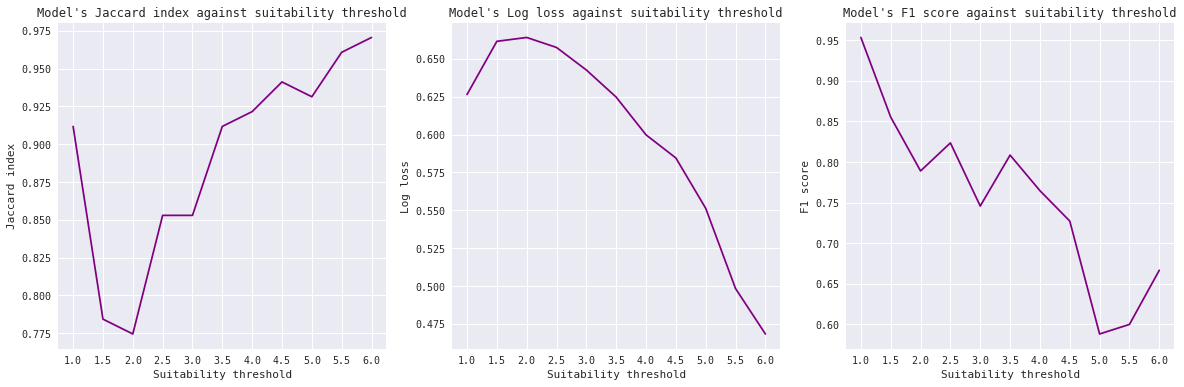

In [42]:
# plot metrics' variation against increasing suitability thresholds

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes[0].plot(jaccard_indexes.keys(), [jaccard_indexes[key] for key in jaccard_indexes.keys()], color='purple')
axes[0].set_xticks(np.arange(1, 6.5, 0.5))
axes[0].set_xlabel('Suitability threshold')
axes[0].set_ylabel('Jaccard index')
axes[0].set_title('Model\'s Jaccard index against suitability threshold')
axes[1].plot(log_losses.keys(), [log_losses[key] for key in log_losses.keys()], color='purple')
axes[1].set_xticks(np.arange(1, 6.5, 0.5))
axes[1].set_xlabel('Suitability threshold')
axes[1].set_ylabel('Log loss')
axes[1].set_title('Model\'s Log loss against suitability threshold')
axes[2].plot(f1_scores.keys(), [f1_scores[key] for key in f1_scores.keys()], color='purple')
axes[2].set_xticks(np.arange(1, 6.5, 0.5))
axes[2].set_xlabel('Suitability threshold')
axes[2].set_ylabel('F1 score')
axes[2].set_title('Model\'s F1 score against suitability threshold')
plt.show()